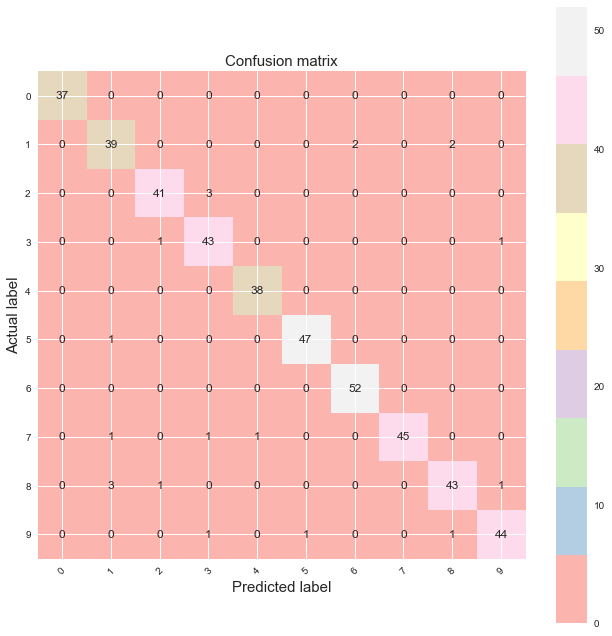

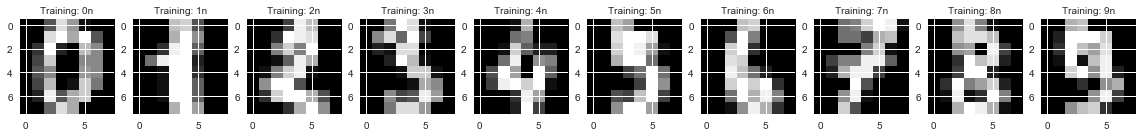

C:\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Trained data Accuracy 0.9962880475129918
New data Accuracy 0.9533333333333334
450 450
Plain cm [[37  0  0  0  0  0  0  0  0  0]
 [ 0 39  0  0  0  0  2  0  2  0]
 [ 0  0 41  3  0  0  0  0  0  0]
 [ 0  0  1 43  0  0  0  0  0  1]
 [ 0  0  0  0 38  0  0  0  0  0]
 [ 0  1  0  0  0 47  0  0  0  0]
 [ 0  0  0  0  0  0 52  0  0  0]
 [ 0  1  0  1  1  0  0 45  0  0]
 [ 0  3  1  0  0  0  0  0 43  1]
 [ 0  0  0  1  0  1  0  0  1 44]]


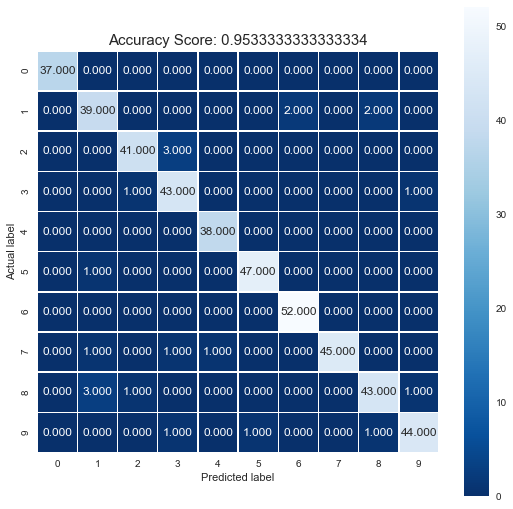

In [12]:
#1.  predict an image labeled with the numbers

from sklearn.datasets import load_digits
import numpy as np
import matplotlib.pyplot as plt

# Scikit library comes with a preloaded digits dataset
#Load preloaded digits dataset
digits = load_digits()

#Visualize the data set
plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(digits.data[0:10], digits.target[0:10])):
    plt.subplot(1, 10, index+1)
    plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray)
    plt.title('Training: %in' % label, fontsize = 10)
plt.show()

# Split data into Training and Test Set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.25, random_state=0)
#print(x_train,y_train)
# Scikit learn has 4 steps modelling pattern
# Step 1 - import the model that we want to use
from sklearn.linear_model import LogisticRegression
# Step 2 - Create an instance of the model
logisticRegr = LogisticRegression()
# Step 3 - Train the model
logisticRegr.fit(x_train, y_train)
# Step 4 - predict the labels for the new data
#logisticRegr.predict(x_test[0].reshape(1,-1))
#ogisticRegr.predict(x_test[0:10])
predictions = logisticRegr.predict(x_test)

# Measure the accuracy
score = logisticRegr.score(x_train, y_train)
print("Trained data Accuracy", score)

score = logisticRegr.score(x_test, y_test)
print("New data Accuracy", score)

#Confustion matrix
from sklearn import metrics
cm = metrics.confusion_matrix(y_test, predictions)
print(len(y_test),len(predictions))
print("Plain cm", cm)
# Visualize cm via seaborn
import seaborn as sns
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15)
plt.show()
# Visualize cm via matplot lib
plt.figure(figsize=(9,9))
plt.imshow(cm, interpolation='nearest', cmap='Pastel1')
plt.title('Confusion matrix', size = 15)
plt.colorbar()
tick_marks = np.arange(10)
plt.xticks(tick_marks, ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"], rotation=45, size = 10)
plt.yticks(tick_marks, ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"], size = 10)
plt.tight_layout()
plt.ylabel('Actual label', size = 15)
plt.xlabel('Predicted label', size = 15)
width, height = cm.shape
for x in range(width):
    for y in range(height):
        plt.annotate(str(cm[x][y]), xy=(y, x), 
        horizontalalignment='center',
        verticalalignment='center')